# Analyzing correspondence networks with CorrNet

## Importing the package

In [1]:
import networkx as nx

import corrnet
from IPython.display import display
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

## Loading and inspecting the data and constructing the graphs

In [3]:
letter_manager = corrnet.LetterManager('data/letter_data.csv', date_col='Date',
                                       sender_col='Sender', addressee_col='Receiver',
                                       attribute_cols=['Written for', 'Institution', 'Recommendation Type', 'Success'])

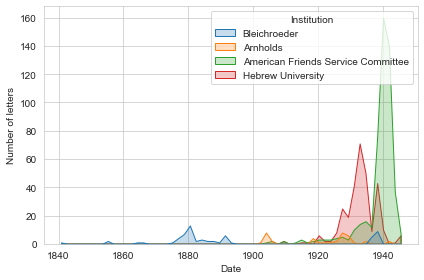

In [6]:
letter_manager.plot_date_distribution(split_attribute='Institution', save_as='date_distr.pdf')

In [4]:
letter_manager.earliest_date(filter_by=('Institution', 'Hebrew University'))

Timestamp('1909-09-30 00:00:00')

In [5]:
letter_manager.latest_date(filter_by=('Institution', 'Hebrew University'))

Timestamp('1945-07-12 00:00:00')

In [4]:
letter_manager.letter_data().value_counts('Institution', dropna=False)

Institution
American Friends Service Committee    505
Hebrew University                     297
Bleichroeder                           61
Arnholds                               39
NaN                                     1
dtype: int64

In [7]:
letter_manager.letter_data().value_counts('Success', dropna=False)

Success
NaN      606
True     150
False    147
dtype: int64

In [5]:
letter_manager.letter_data().value_counts('Recommendation Type', dropna=False)

Recommendation Type
Formal Recommendation         386
Introduction                  236
Informal Recommendation       157
Request for Recommendation    123
NaN                             1
dtype: int64

In [3]:
digraph, multi_digraph, line_graph = letter_manager.construct_graphs(earliest_date='1909-09-30', latest_date='1945-07-12')
digraph_hu, multi_digraph_hu, line_graph_hu = letter_manager.construct_graphs(filter_by=('Institution', 'Hebrew University'))

In [13]:
list(multi_digraph.edges(data=True))[0][2]

{'Date': Timestamp('1909-09-30 00:00:00'),
 'Written for': 'Brieger Richard',
 'Institution': 'Hebrew University',
 'Recommendation Type': 'Formal Recommendation',
 'Success': False}

In [63]:
len(list(nx.algorithms.weakly_connected_components(line_graph_hu))[0])

223

In [70]:
nx.Graph(line_graph_hu).number_of_nodes()

297

## Differential centrality analysis

### For in-centralities

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.653e-04 U_stat=4.632e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:8.932e-05 U_stat=9.810e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:9.892e-05 U_stat=4.668e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False:

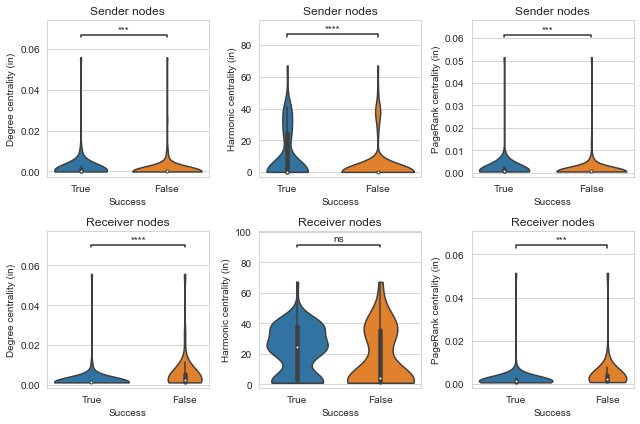

In [46]:
corrnet.differential_centrality_analysis(digraph, multi_digraph, 'Success', 'in', save_as='in_centrality_analysis.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.803e-04 U_stat=4.626e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.024e-04 U_stat=1.000e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.029e-04 U_stat=4.666e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False:

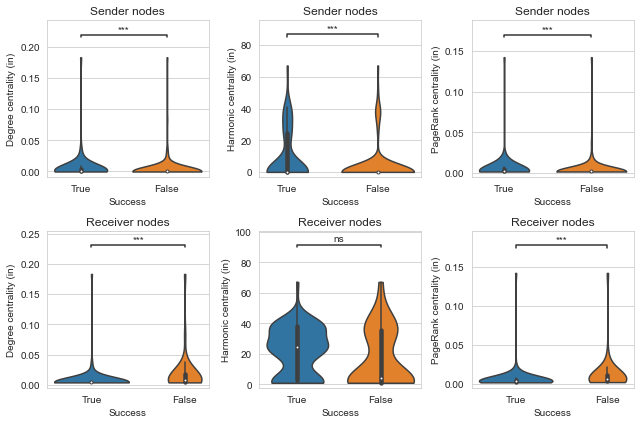

In [4]:
corrnet.differential_centrality_analysis(digraph_hu, multi_digraph_hu, 'Success', 'in', save_as='in_centrality_analysis_hu.pdf')

### For out-centralities

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:1.775e-03 U_stat=4.358e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:2.563e-01 U_stat=1.395e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:4.902e-02 U_stat=4.284e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False:

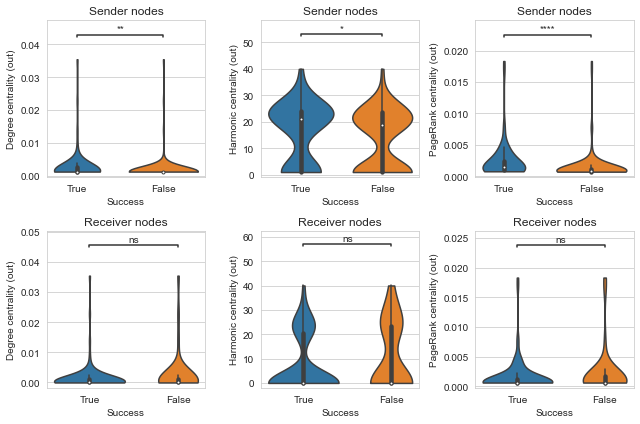

In [49]:
corrnet.differential_centrality_analysis(digraph, multi_digraph, 'Success', 'out', save_as='out_centrality_analysis.pdf')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-03 U_stat=4.298e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:2.341e-01 U_stat=1.386e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False: Mann-Whitney-Wilcoxon test two-sided, P_val:6.052e-02 U_stat=4.254e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True vs. False:

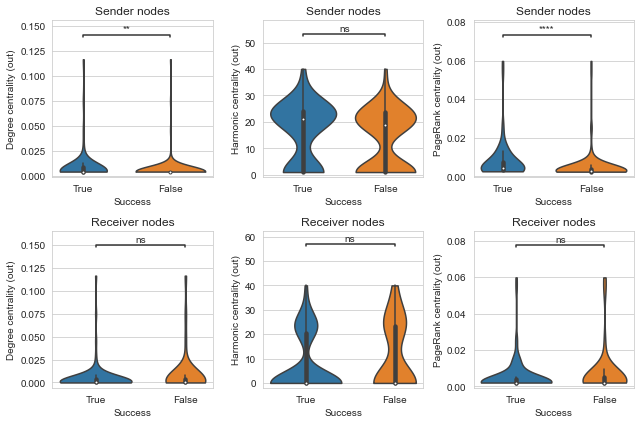

In [5]:
corrnet.differential_centrality_analysis(digraph_hu, multi_digraph_hu, 'Success', 'out', save_as='out_centrality_analysis_hu.pdf')

## Semi-supervised analysis

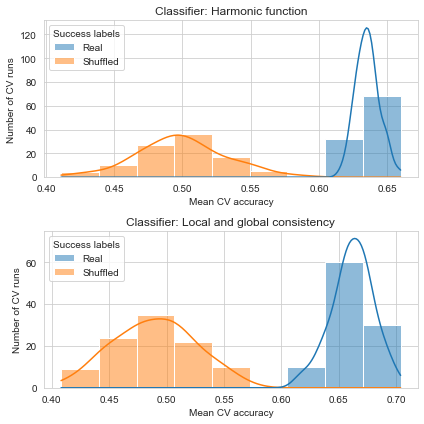

In [51]:
corrnet.semi_supervised_analysis(line_graph, 'Success', save_as='semi_supervised_analysis.pdf')

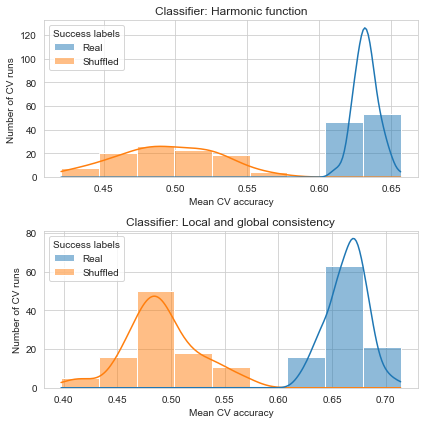

In [52]:
corrnet.semi_supervised_analysis(line_graph_hu, 'Success', save_as='semi_supervised_analysis_hu.pdf')

## Close-up look at most successful sender nodes.

In [14]:
nodes_w_2_roles = [(node, multi_digraph_hu.in_degree(node), multi_digraph_hu.out_degree(node)) for node in multi_digraph_hu.nodes() if multi_digraph_hu.in_degree(node) > 0 and multi_digraph_hu.out_degree(node)]
nodes_w_2_roles.sort(key=lambda t: t[1]+t[2], reverse=True)

In [15]:
nodes_w_2_roles

[('Magnes Judah Leon', 69, 36),
 ('Fodor Andor', 10, 20),
 ('Brieger Richard', 22, 6),
 ('Senator David Werner', 10, 11),
 ('Warburg Otto', 8, 5),
 ('Ornstein Leonard Salomon', 5, 6),
 ('Weizmann Chaim', 4, 5),
 ('Schloessinger M', 4, 4),
 ('Ben David M.', 1, 7),
 ('Bentwich Norman', 1, 6),
 ('Eisler Alfred', 5, 1),
 ('Kligler Israel Jacob', 2, 4),
 ('Neuberg Carl', 4, 2),
 ('Warburg Max', 3, 3),
 ('Goldforb', 3, 2),
 ('Fraenkel Adolf Abraham', 1, 3),
 ('Finkel Samuel B.', 3, 1),
 ('Olschki Leonardo', 1, 2),
 ('Bechhold Heinrich Jakob', 2, 1),
 ('Hirsch Rudolf', 2, 1),
 ('Oppenheimer Franz', 1, 2),
 ('Halberstädter Ludwig', 2, 1),
 ('Wolff P.', 1, 2),
 ('Polak Jakob', 1, 1),
 ('Wiegner Georg', 1, 1),
 ('Harrassowitz Hermann', 1, 1),
 ('Hoffmann Ernst', 1, 1),
 ('Blondheim David S.', 1, 1),
 ('Gundolf Friedrich', 1, 1),
 ('Einstein Albert', 1, 1),
 ("De Angelis d'Ossat Guglielmo", 1, 1),
 ('Lipman Jacob Goodale', 1, 1),
 ('Comber N. M.', 1, 1),
 ('Hissink David Jacobus', 1, 1),
 ('Praus

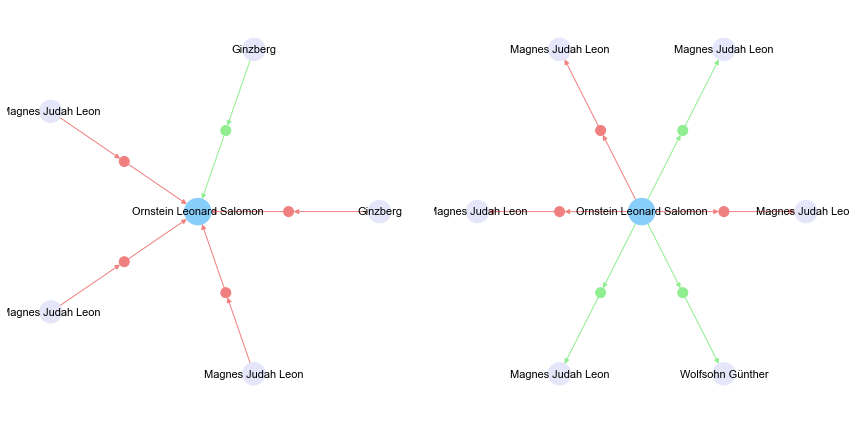

In [7]:
corrnet.plot_neighborhood(multi_digraph_hu, 'Ornstein Leonard Salomon', margins=(.075, .075), edge_color_info=('Success', {True: 'lightgreen', False: 'lightcoral'}),
                          font_size=11)

In [10]:
[e for e in multi_digraph_hu.edges(data=True) if e[1] == 'Ornstein Leonard Salomon']

[('Magnes Judah Leon',
  'Ornstein Leonard Salomon',
  {'Date': Timestamp('1930-01-27 00:00:00'),
   'Written for': 'Landsberg',
   'Institution': 'Hebrew University',
   'Recommendation Type': 'Request for Recommendation',
   'Success': False}),
 ('Magnes Judah Leon',
  'Ornstein Leonard Salomon',
  {'Date': Timestamp('1930-01-27 00:00:00'),
   'Written for': 'Mandelstamm',
   'Institution': 'Hebrew University',
   'Recommendation Type': 'Request for Recommendation',
   'Success': False}),
 ('Magnes Judah Leon',
  'Ornstein Leonard Salomon',
  {'Date': Timestamp('1930-01-27 00:00:00'),
   'Written for': 'Joffe',
   'Institution': 'Hebrew University',
   'Recommendation Type': 'Request for Recommendation',
   'Success': False}),
 ('Ginzberg',
  'Ornstein Leonard Salomon',
  {'Date': Timestamp('1927-11-02 00:00:00'),
   'Written for': 'Kolthoff Izaak Maurits',
   'Institution': 'Hebrew University',
   'Recommendation Type': 'Request for Recommendation',
   'Success': False}),
 ('Ginzber

In [44]:
multi_digraph_hu.get_edge_data('Bentwich Norman', 'Senator David Werner',)

{0: {'Date': Timestamp('1938-01-28 00:00:00'),
  'Written for': 'Kahn',
  'Institution': 'Hebrew University',
  'Recommendation Type': 'Y',
  'Success': False},
 1: {'Date': Timestamp('1938-01-28 00:00:00'),
  'Written for': 'Kahn',
  'Institution': 'Hebrew University',
  'Recommendation Type': 'Y',
  'Success': False},
 2: {'Date': Timestamp('1938-01-28 00:00:00'),
  'Written for': 'Kahn',
  'Institution': 'Hebrew University',
  'Recommendation Type': 'Y',
  'Success': False},
 3: {'Date': Timestamp('1938-01-28 00:00:00'),
  'Written for': 'Kahn',
  'Institution': 'Hebrew University',
  'Recommendation Type': 'Y',
  'Success': False},
 4: {'Date': Timestamp('1938-01-28 00:00:00'),
  'Written for': 'Kahn',
  'Institution': 'Hebrew University',
  'Recommendation Type': 'Y',
  'Success': False},
 5: {'Date': Timestamp('1938-01-28 00:00:00'),
  'Written for': 'Kahn',
  'Institution': 'Hebrew University',
  'Recommendation Type': 'Y',
  'Success': False},
 6: {'Date': Timestamp('1938-01-28

In [26]:
subgraph_success = nx.MultiDiGraph([edge for edge in multi_digraph_hu.edges(data=True) if edge[2]['Success'] == True])

nodes = []
in_success_rates = []
out_success_rates = []
success_nodes = set(subgraph_success.nodes())
for node in multi_digraph_hu.nodes:
    nodes.append(node)
    in_deg = multi_digraph_hu.in_degree(node)
    out_deg = multi_digraph_hu.out_degree(node)
    if in_deg == 0:
        in_success_rates.append(0.0)
    else:
        if node in success_nodes:
            in_success_rates.append(subgraph_success.in_degree(node) / in_deg)
        else:
            in_success_rates.append(0.0)
    if out_deg == 0:
        out_success_rates.append(0.0)
    else:
        if node in success_nodes:
            out_success_rates.append(subgraph_success.out_degree(node) / out_deg)
        else:
            out_success_rates.append(0.0)


success_rates = pd.DataFrame(data={
    'Success rate (as receiver)': in_success_rates,
    'Success rate (as sender)': out_success_rates,
}, index=nodes)

In [39]:
multi_digraph_hu.predecessors('Senator David Werner')

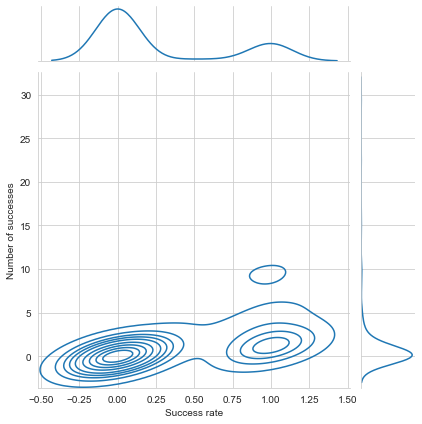

In [80]:
sns.jointplot(data=success_rates,x='Success rate', y='Number of successes', kind='kde')

In [40]:
subgraph_2 = nx.MultiDiGraph([edge for edge in multi_digraph.edges() if edge[0] in top_3_most_successfull])
colors = nx.get_edge_attributes(subgraph_2,'color').values()

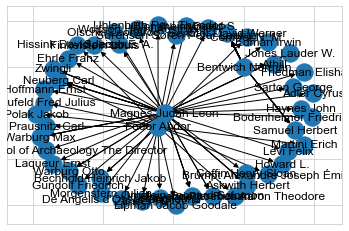

In [43]:
subgraph_2.number_of_nodes()
nx.draw(subgraph_2)

### Display earlierst and latest date

In [4]:
print(f'Earliest date: {letter_manager.earliest_date()}.')
print(f'Latest date: {letter_manager.latest_date()}.')

Earliest date: 1839-11-17 00:00:00.
Latest date: 1946-05-24 00:00:00.


### Plot the date distribution
#### a) Aggregated over all letters

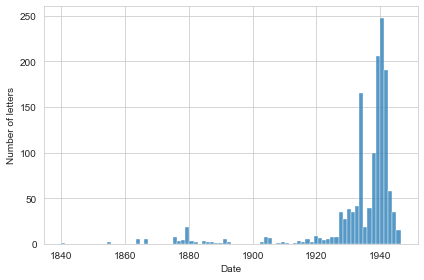

In [6]:
letter_manager.plot_date_distribution(save_as='date_distr.pdf')

#### b) Seperated by letter type

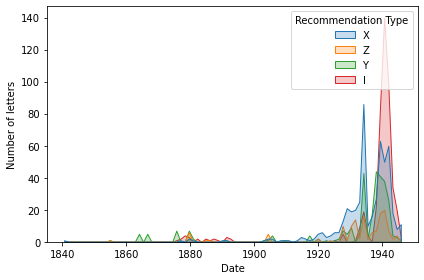

In [6]:
letter_manager.plot_date_distribution(by_type=True)

## Carrying out network analyses
### Generated directed graph from letter data

In [4]:
g = letter_manager.to_digraph(earliest_date='1933-01-30', latest_date='1945-05-08', subjects_as_nodes=False)

### Plot the in- and out-neighbors of a selected node.

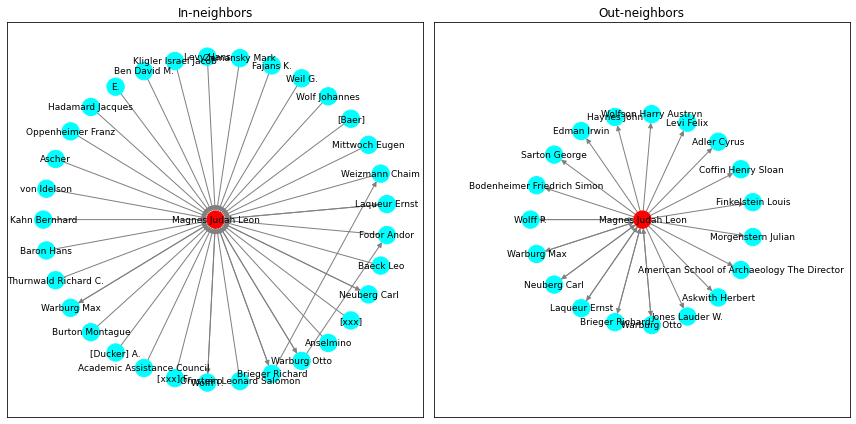

In [7]:
node = 'Magnes Judah Leon'
corrnet.plot_neighborhood(g, node, margins=(None, .35))

### Plot degree distributions

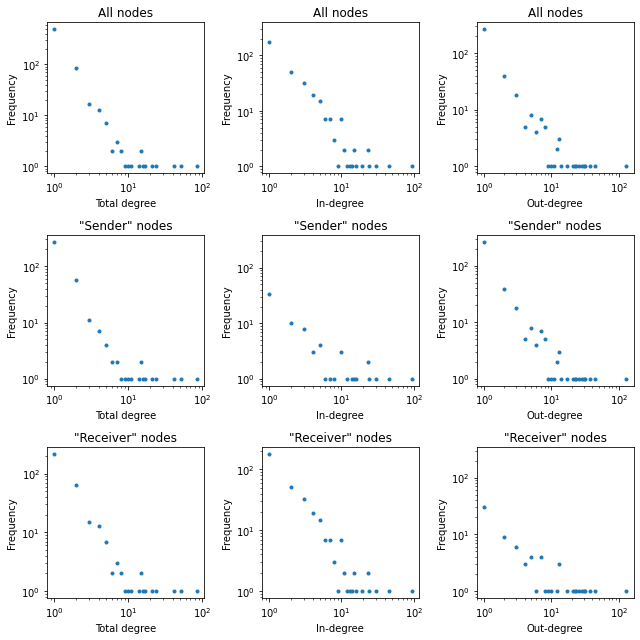

In [12]:
corrnet.plot_degree_distributions(g, save_as='degrees.pdf', use_weights=True, loglog=True)

### Compute Pagerank centralities

In [13]:
pageranks = corrnet.compute_pagerank(g, k=10)

### Display most important receiver nodes

In [15]:
print('Most important receiver nodes:')
for i, t in enumerate(pageranks['original']['top_10']):
    print(f'{i+1}. {t[0]}')

Most important receiver nodes:
1. Magnes Judah Leon
2. Hambly Hanstein Kathleen
3. Krauss Hertha
4. Brieger Richard
5. AFSC Organisation
6. Fuson Nelson
7. Senator David Werner
8. Rogers Mary M.
9. Schwabach Paul Julius von
10. Hessberg Richard


### Display most important sender nodes

In [16]:
print('Most important sender nodes:')
for i, t in enumerate(pageranks['reversed']['top_10']):
    print(f'{i+1}. {t[0]}')

Most important sender nodes:
1. Hambly Hanstein Kathleen
2. Krauss Hertha
3. Salmon Charlotte S.
4. Schwabach Paul Julius von
5. Magnes Judah Leon
6. Cope Alice
7. Schauffler Marjorie Page
8. Timbres Rebecca
9. Rogers Mary M.
10. Montague Harriet


## Carry out temporal analyses
### Compute network and node properties for directed graphs constructed over sliding windows

In [21]:
temporal_data = corrnet.temporal_analysis(letter_manager, earliest_date='1920-01-01', window_size='3 y', latest_date=None, step_width='2 y', subjects_as_nodes=False)

In [19]:
temporal_data

,window_start,window_end,node_preservation,edge_preservation,node_novelty,edge_novelty,node_congruence,edge_congruence,num_nodes,num_edges,...,pagerank_reversed_Kingsley Robert A.,pagerank_reversed_Skoss Solomon L.,pagerank_reversed_Mayer L.A.,pagerank_reversed_Charp S.,pagerank_reversed_Della Vida G. Levi,pagerank_reversed_Walton George,pagerank_reversed_Hartog Philip,pagerank_reversed_Rosen,pagerank_reversed_Hadi Abdul,pagerank_reversed_Washburn Arthur H.
0,1920-01-01,1923-01-01,NaN,NaN,NaN,NaN,NaN,NaN,17,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1920-03-01,1923-03-01,1.000000,1.000000,0.150000,0.166667,0.850000,0.833333,20,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1920-05-01,1923-05-01,1.000000,1.000000,0.090909,0.076923,0.909091,0.923077,22,13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1920-07-01,1923-07-01,0.954545,0.923077,0.000000,0.000000,0.954545,0.923077,21,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1920-09-01,1923-09-01,0.904762,0.916667,0.000000,0.000000,0.904762,0.916667,19,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1942-11-01,1945-11-01,0.923077,0.938776,0.000000,0.021277,0.923077,0.920000,60,47,...,0.135700,0.088937,0.073349,0.215023,0.120112,0.073349,0.073349,0.073349,0.073349,0.000000
138,1943-01-01,1946-01-01,0.950000,0.936170,0.000000,0.000000,0.950000,0.936170,57,44,...,0.147839,0.096895,0.079914,0.221582,0.130858,0.079914,0.079914,0.079914,0.079914,0.000000
139,1943-03-01,1946-03-01,0.929825,0.931818,0.000000,0.000000,0.929825,0.931818,53,41,...,0.180062,0.118012,0.097329,0.238985,0.159379,0.097329,0.097329,0.097329,0.097329,0.000000
140,1943-05-01,1946-05-01,0.962264,0.975610,0.000000,0.000000,0.962264,0.975610,51,40,...,0.180062,0.118014,0.097331,0.239001,0.159379,0.097331,0.097331,0.097331,0.097331,0.000000


### Plot the network dynamics (node and edge changes)

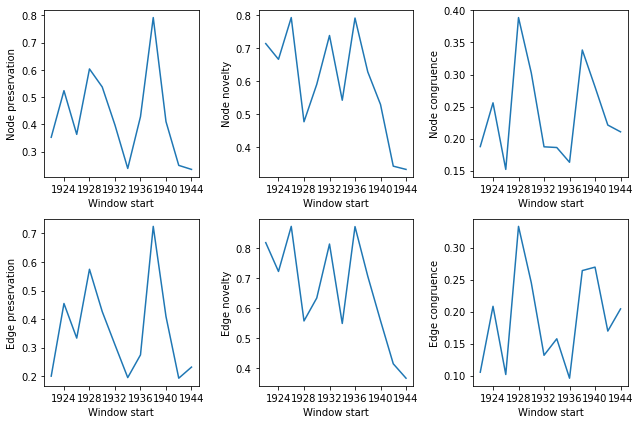

In [22]:
corrnet.plot_network_dynamics(temporal_data)

### Plot network properties over time

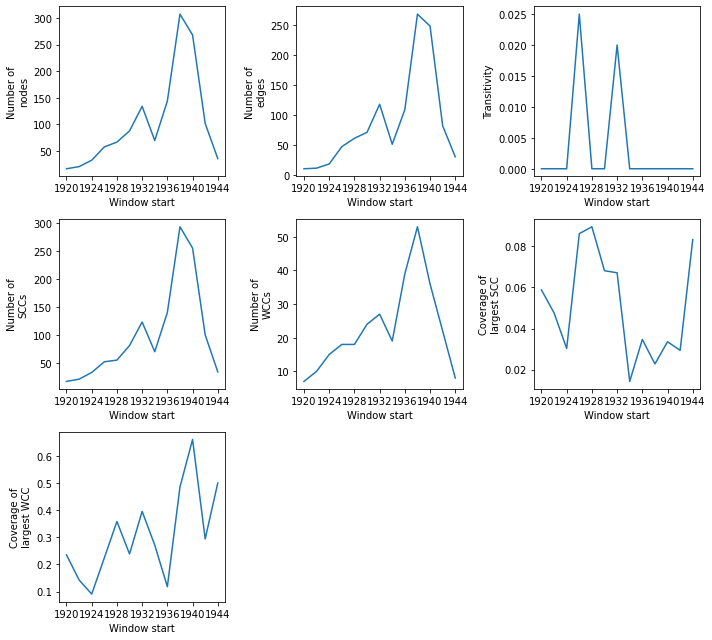

In [23]:
corrnet.plot_network_properties(temporal_data, figsize=(10,9))

### Plot Pagerank centralities of selected nodes over time

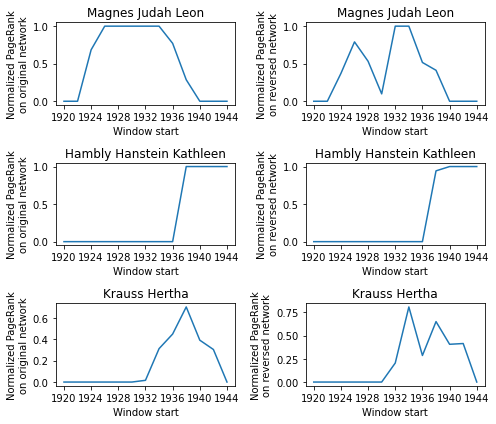

In [25]:
corrnet.plot_pagerank(temporal_data, nodes=['Magnes Judah Leon', 'Hambly Hanstein Kathleen', 'Krauss Hertha'], figsize=(7,6), save_as='pageranks.png')